# K-Nearest Neighbours Classification

KNN is a classification technique (supervised learning) where the labels of the unknown data are based on the proximity to the already classified k-nearest neighbors (being k an integrer parameter to define). The most repeated label between these neighbors defines the class of the new data point.

Here KNN will be applied on the Wine Dataset. The dataset contains 178 different wines divided in 3 classes from which we know 13 properties. We try to find a method to classify the unknown wines. Using only 2 of the 13 variables that the dataset contains (to be able to visualize in 2D) the unknown wines will be in the future classified based on their nearest neighbors (using k of them).

*Bear in mind that we could have solved this problem more generally consdering the distance not only based on the two chosen variables, but considering all the variables. However, to simplify the work, we will stick with only 2. The results are surprisingly good anyways!*

### Table of Contents
- [0. Loading the Dataset](#0.-Loading-the-Dataset)
- [1. Preliminary Steps](#1.-Preliminary-Steps)
- [2. KNN: Function and Visualization](#2.-KNN:-Function-and-Visualization)
- [3. Finding the best k with Cross-Validation](#3.-Finding-the-best-k-with-Cross-Validation)

In [2]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math

## 0. Loading the Dataset

We load the dataset, and standarize the variables. This is necessary since we are considering distances, and there might be a difference in order of magnitude due to the nature of the variables.

In [14]:
from sklearn.datasets import load_wine
from matplotlib import colors as c

wine_data = load_wine()

X = wine_data.data
Y = wine_data.target
#print(wine_data.DESCR)

NX=X

#Standardizing
for k in range(0,np.shape(NX)[1]): 
  NX[:,k]=(NX[:,k]-np.mean(NX[:,k]))/np.std(NX[:,k])

## 1. Data Visualization and Preliminary Steps

We will define the eucliean distance to the two chosen variables and define the grid over which our results will be plotted.

#### Visualizing the Space of the Chosen variables
Variables 11 and 12 from the dataset are chosen: *OD280/OD315 of diluted wines* and *Proline*. Let's visualize how the data look in this 2D space.

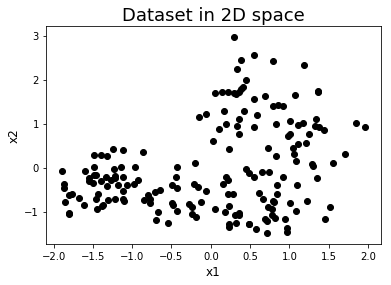

In [25]:
x1=NX[:,11:12]
x2=NX[:,12:13]
plt.scatter(x1,x2,c='k')
plt.title('Dataset in 2D space',fontsize=18)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.show()

#### Distance Function
The euclidean distance function in the space of the chosen variables is also defined.

In [17]:
def dist(vx1,vx2):
  DistVect=np.empty([np.shape(NX)[0],1])
  difx1=x1-vx1
  difx2=x2-vx2
  distance=np.sqrt(difx1**2+difx2**2)
  DistVect=distance
  return DistVect

#### Color Grid

To visualize KNN we will generate a grid and color it and produce a random color map to test that it works.

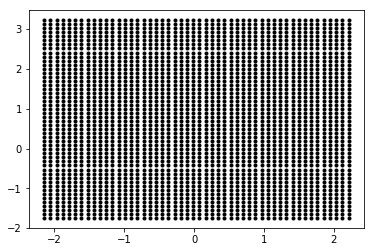

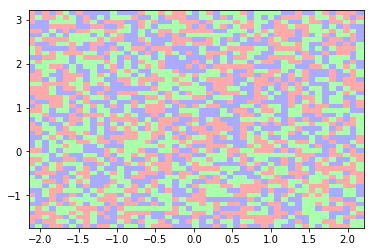

In [18]:
N=50    #number of bins on each dimension
linx1=np.linspace(min(x1)-0.25,max(x1)+0.25,N)     #We extend the grid borders by 0.25 so the colored region does not end sharply at the min/max
linx2=np.linspace(min(x2)-0.25,max(x2)+0.25,N)
x1m, x2m = np.meshgrid(linx1,linx2)
plt.plot(x1m,x2m,marker='.',linestyle='none',color='k')
plt.show()

#Random color map
cMap = c.ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])  #salmon, skygreen, skyblue
z = np.random.randint(0, 3, size=(x1m.shape[0], x2m.shape[1]))
plt.pcolormesh(x1m, x2m, z,cmap=cMap)
plt.show()

## 2. KNN: Function and Visualization

Finally, we can generate our KNN function, based on the chosen variables and the euclidean distance function.

We will generate it for different k (number of nearest neighbors) values, to see the difference.

In [21]:
import heapq
from heapq import nsmallest    #This allows to select the n smallest elements in a list

def KNN(x1,x2,Y,k,dist):
  #Empty matrix of color with dimension NxN
  ColorMatrix=np.empty([N,N])
  #We assign color based on KNN
  for i,vi in enumerate(linx1):          
    for j,vj in enumerate(linx2):                                     #Chooses a bin of the grid
      d=list(dist(vi,vj))                                             #List of distances to points (wines)
      min_dist = [float(heapq.nsmallest(k,d)[p]) for p in range(k)]   #List of the k smallest distance values to the bin
      min_indices = [d.index(min_dist[q]) for q in range(k)]          #List of indices for the k smallest distances
      types_count = np.bincount(Y[min_indices])                       #From min_indices list, count how many wines of each type
      ColorMatrix[j,i] = np.argmax(types_count)                       #Choose the wine index (color) of the most repeated wine // RECALL: matrix with inverted (i,j) --> rows x columns 
                                                                      
  plt.pcolormesh(x1m, x2m, ColorMatrix,cmap=cMap)                     #Assigns colors to mesh from ColorMatrix colors
  
  #Scatter with color dependent on Y (wine type)
  plt.scatter(x1[Y==0,:],x2[Y==0,:],c='darkred',label='Wine 0')    
  plt.scatter(x1[Y==1,:],x2[Y==1,:],c='darkgreen',label='Wine 1')
  plt.scatter(x1[Y==2,:],x2[Y==2,:],c='darkblue',label='Wine 2')
  plt.xlabel('x1', fontsize=12)
  plt.ylabel('x2', fontsize=12)
  plt.title("K = " + str(k),fontsize=18)
  plt.legend()
  plt.show()      

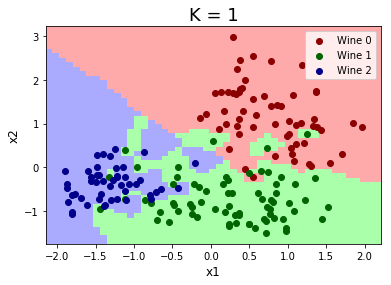

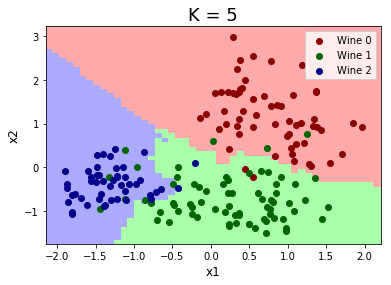

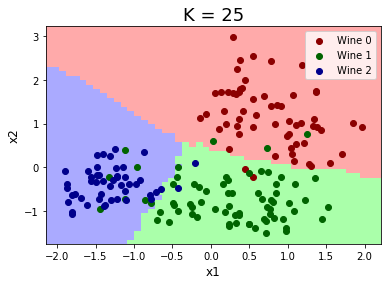

In [22]:
KNN(x1,x2,Y,1,dist)
KNN(x1,x2,Y,5,dist)
KNN(x1,x2,Y,25,dist)

## 3. Finding the best k with Cross-Validation

The dataset is divided in train/test. Using K-fold with n=10, we get an average accuracy (from the 10 iterations). Having a single value for each k, we are able to choose the best k. This is compared afterwards with the test accuracy (no K-fold used here, simply accuracy with test), to see if our prediction is good enough or the model is overfitted.

The best k estimated is 22 with train accuracy 0.9602564102564102 and test accuracy 0.9629629629629629


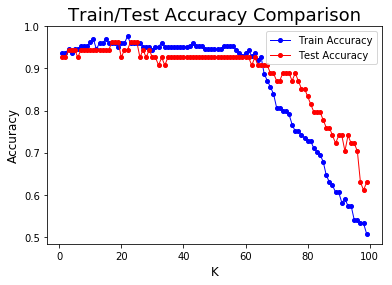

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

#Generate Train/Test
X_Train, X_test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.3)
#Standardize
X_Train = scale(X_Train, with_mean=True, with_std=True)
X_test = scale(X_test, with_mean=True, with_std=True)

accuracy_train = []
accuracy_test = []

Krange = range(1, 100)

for k in Krange:
  kf = KFold(n_splits=10)
  score = []
  
  #We split our train data into the 10-folds and generate a score value for each iteration. Then, we store the average of all of them.
  for train_index, test_index in kf.split(X_Train):
      
      X_train, X_val = X_Train[train_index], X_Train[test_index]
      Y_train, Y_val = Y_Train[train_index], Y_Train[test_index]
      
      neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
      score.append(neigh.score(X_val, Y_val))
      
  accuracy_train.append(np.mean(score))

#Finally, we plot the averaged accuracy for each k
plt.plot(Krange, accuracy_train, marker="o",markersize=4,color='blue',lw=1,label='Train Accuracy')

#Previously we got a score value from k-fold, meaning, we trained with k-1 and used one fold as validation
#Now we compare directly to the test subset
for k in Krange:
  
  neigh = KNeighborsClassifier(n_neighbors=k).fit(X_Train, Y_Train)

  accuracy_test.append(neigh.score(X_test, Y_test))  
plt.plot(Krange, accuracy_test,marker='o',markersize=4,color='red',lw=1,label='Test Accuracy')
plt.xlabel('K', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.title('Train/Test Accuracy Comparison',fontsize=18)

bestK = np.argsort(accuracy_train)[-1] + 1
print('The best k estimated is',bestK,'with train accuracy',accuracy_train[bestK+1],'and test accuracy',accuracy_test[bestK+1])

As we can see, even if the maximum value of the test and train accuracy do not occur for the same k, our method is still pretty good and away from overfitting.

*Note: there is an important problem here, and it is the lack of instances of the dataset. <200 is a tiny amount for classification purposes. Still, our method gets the job done with high accuracy.*